Import libraries

In [1]:
import pandas as pd

Vizualize the data

In [2]:
data_origin = pd.read_csv('Data/bonbanh.csv')
data_origin


,Tên xe,Năm sản xuất,Tình trạng,Số km đã đi,Xuất xứ,Kiểu dáng,Hộp số,Động cơ,Màu ngoại thất,Màu nội thất,Dẫn động sau,Số chỗ ngồi,Giá xe
0,Xe Toyota Corolla Cross 1.8V,2022,Xe đã dùng,"3,000 Km",Nhập khẩu,SUV,Số tự động,Xăng 1.8 L,Trắng,Nâu,FWD - Dẫn động cầu trước,5 chỗ,810 Triệu
1,Xe BMW 5 Series 530i Luxury Line,2019,Xe đã dùng,"37,000 Km",Nhập khẩu,Sedan,Số tự động,Xăng 2.0 L,Xanh,Nhiều màu,RFD - Dẫn động cầu sau,5 chỗ,1 Tỷ 480 Triệu
2,Xe Mercedes Benz C class C200 Avantgarde Plus,2022,Xe đã dùng,"6,500 Km",Lắp ráp trong nước,Sedan,Số tự động,Xăng 1.5 L,Trắng,Đen,RFD - Dẫn động cầu sau,5 chỗ,1 Tỷ 590 Triệu
3,Xe Mazda 3 1.5 AT,2016,Xe đã dùng,"67,000 Km",Lắp ráp trong nước,Sedan,Số tự động,Xăng 1.5 L,Đỏ,Đen,FWD - Dẫn động cầu trước,5 chỗ,412 Triệu
4,Xe Lexus ES 250,2022,Xe đã dùng,"5,000 Km",Nhập khẩu,Sedan,Số tự động,Xăng 2.5 L,Xanh,Nâu,FWD - Dẫn động cầu trước,5 chỗ,2 Tỷ 300 Triệu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Xe Mercedes Benz GLE Class GLE 43 AMG 4Matic C...,2018,Xe đã dùng,"23,000 Km",Nhập khẩu,Coupe,Số tự động,Xăng 3.0 L,Đỏ,Đen,AWD - 4 bánh toàn thời gian,5 chỗ,2 Tỷ 399 Triệu
496,Xe Lexus RX 300,2022,Xe đã dùng,"9,000 Km",Nhập khẩu,SUV,Số tự động,Xăng 2.0 L,Trắng,Nâu,AWD - 4 bánh toàn thời gian,5 chỗ,3 Tỷ 180 Triệu
497,Xe Toyota Fortuner 2.7V 4x2 AT,2019,Xe đã dùng,"77,000 Km",Nhập khẩu,SUV,Số tự động,Xăng 2.7 L,Đen,Nâu,RFD - Dẫn động cầu sau,7 chỗ,775 Triệu
498,Xe Mercedes Benz C class C300 AMG,2022,Xe đã dùng,"7,500 Km",Lắp ráp trong nước,Sedan,Số tự động,Xăng 2.0 L,Trắng,Nhiều màu,RFD - Dẫn động cầu sau,5 chỗ,1 Tỷ 830 Triệu


Change value 'Xe mới' in column 'Số km đã đi' into '0 km'

In [3]:
# replace Xe moi at column 'Tình trạng' with 0 Km
data_origin['Số km đã đi'] = data_origin['Số km đã đi'].replace('Xe mới', '0 Km')

In [4]:
#classifing car type
#remove the first text from Tên xe column
data_origin['Tên xe'] = data_origin['Tên xe'].str.replace('Xe ', '')
check =  lambda x : ' '.join(x.split()[:1]) if x.split()[0] != "Mercedes" else ' '.join(x.split()[:2])
cartype = data_origin['Tên xe'].apply(check)
data_origin['Hang xe'] = cartype

In [5]:
#classifing car series
#remove 2 first words from Tên xe column if the first word is not Merceides else take 1 word
data_origin['Tên xe'] = data_origin['Tên xe'].apply(lambda x : ' '.join(x.split()[1:]) if x.split()[0] != "Mercedes" else ' '.join(x.split()[2:]))

In [6]:
classcheck = lambda x: ' '.join(x.split()[:2]) if (x.split()[0] == "4" or x.split()[0]=="Range Rover" or x.split()[0]=="Lux" or x.split()[0]== "Range" ) else ' '.join(x.split()[:1])
series = data_origin['Tên xe'].apply(classcheck)
data_origin['Series'] = series

In [7]:
#remove the "km" from Số km đã đi column
data_origin['Số km đã đi'] = data_origin['Số km đã đi'].str.replace('Km', '')

In [8]:
#get Dung tich column from Dong co column
data_origin['Dung tich'] = data_origin['Động cơ'].str.extract(r'(\d\.\d)')

In [9]:
#get fuel type from Dong co column 
data_origin['Loại nhiên liệu'] = data_origin['Động cơ'].str.extract(r'(Xăng|Dầu|Hybrid|Điện)')

#if Loại nhiên liệu is Dien then Dung tich is 0
data_origin['Dung tich'] = data_origin['Dung tich'].fillna(0)

In [10]:
#remove "cho" from So cho ngoi column
data_origin['Số chỗ ngồi'] = data_origin['Số chỗ ngồi'].str.replace('chỗ', '')

In [15]:
def convert_price(price):
    price = price.split(" ")
    gia = 0
    for i in range(len(price)):
        if price[i] == "Tỷ":   
            gia = gia + int(price[i-1])*1000000000
        elif price[i] == "Triệu":
            gia = gia + int(price[i-1])*1000000
        elif price[i] == "Nghìn":
            gia = gia + int(price[i-1])*1000
    return gia

data_origin['Giá xe'] = data_origin['Giá xe'].apply(convert_price)




In [16]:
#remove "Dong co" column
data_origin = data_origin.drop('Động cơ', axis=1)

In [17]:
#remove "Ten xe" column
data_origin = data_origin.drop('Tên xe', axis=1)

In [19]:
# /1000000 from "Gia xe" column
data_origin['Giá xe'] = data_origin['Giá xe']/1000000

C:\Users\admin\AppData\Local\Temp\ipykernel_25324\1199556841.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_origin['Giá xe'], bins=50)


<Axes: title={'center': 'Car price distribution'}, xlabel='Giá xe', ylabel='Density'>

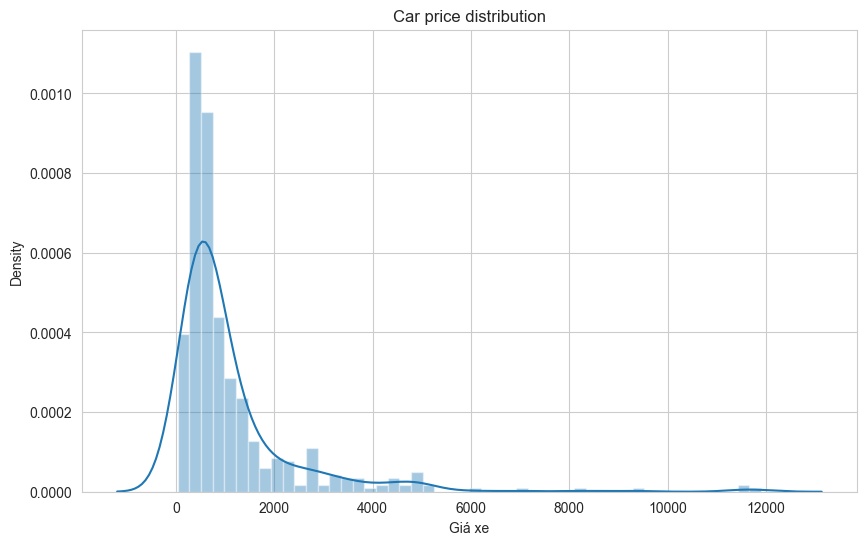

In [20]:
#plot car price distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Car price distribution')
sns.distplot(data_origin['Giá xe'], bins=50)

In [21]:
#take firt word from "Dan dong sau" column
data_origin['Dẫn động sau'] = data_origin['Dẫn động sau'].apply(lambda x: x.split()[0])